In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore 
from scipy import stats
from scipy.stats import skew 
from sklearn.model_selection import train_test_split, GridSearchCV ,RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV

# Read Dataset

In [87]:
df = pd.read_csv('used_device_data.csv')

In [88]:
df

,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3449,Asus,Android,15.34,yes,no,NaN,8.0,64.0,6.0,5000.0,190.0,2019,232,4.492337,6.483872
3450,Asus,Android,15.24,yes,no,13.0,8.0,128.0,8.0,4000.0,200.0,2018,541,5.037732,6.251538
3451,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,4.357350,4.528829
3452,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,2.0,4000.0,160.0,2020,149,4.349762,4.624188


In [4]:
'''device_brand: Name of manufacturing brand
os: OS on which the device runs
screen_size: Size of the screen in cm
4g: Whether 4G is available or not
5g: Whether 5G is available or not
front_camera_mp: Resolution of the rear camera in megapixels
back_camera_mp: Resolution of the front camera in megapixels
internal_memory: Amount of internal memory (ROM) in GB
ram: Amount of RAM in GB
battery: Energy capacity of the device battery in mAh
weight: Weight of the device in grams
release_year: Year when the device model was released
days_used: Number of days the used/refurbished device has been used
normalized_new_price: Normalized price of a new device of the same model
normalized_used_price (TARGET): Normalized price of the used/refurbished device'''

'device_brand: Name of manufacturing brand\nos: OS on which the device runs\nscreen_size: Size of the screen in cm\n4g: Whether 4G is available or not\n5g: Whether 5G is available or not\nfront_camera_mp: Resolution of the rear camera in megapixels\nback_camera_mp: Resolution of the front camera in megapixels\ninternal_memory: Amount of internal memory (ROM) in GB\nram: Amount of RAM in GB\nbattery: Energy capacity of the device battery in mAh\nweight: Weight of the device in grams\nrelease_year: Year when the device model was released\ndays_used: Number of days the used/refurbished device has been used\nnormalized_new_price: Normalized price of a new device of the same model\nnormalized_used_price (TARGET): Normalized price of the used/refurbished device'

# Null Values

In [89]:
df.isnull().sum()

device_brand               0
os                         0
screen_size                0
4g                         0
5g                         0
rear_camera_mp           179
front_camera_mp            2
internal_memory            4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

# Mean, Median, Mode, Variance, Standard Deviation

In [90]:
mean_value = df['rear_camera_mp'].mean()
mean_value
print('Mean value of rear_camera_mp is : ', mean_value)

median_value = df['rear_camera_mp'].median() # Middle Value of rear camera megapixles column
median_value
print ('Median Value of rear camera mp is  : ',median_value)

mode_value = df['rear_camera_mp'].mode() # Most occuring value in rear camera megapixles column 
print(f"Mode rear camera mp : {mode_value.values.tolist()}")
mode_counts = df['rear_camera_mp'].value_counts()

variance_value = df['rear_camera_mp'].var() # Measure How datapoints differ from the mean
variance_value
print ('Variance value of rear camera is : ',variance_value)

Std_dev_value = df['rear_camera_mp'].std() # Measure How scattered the data is in relation to the mean
Std_dev_value 
print ('Standard deviation value of rear camera mp  is : ',Std_dev_value)


Mean value of rear_camera_mp is :  9.460207633587787
Median Value of rear camera mp is  :  8.0
Mode rear camera mp : [13.0]
Variance value of rear camera is :  23.188666969703434
Standard deviation value of rear camera mp  is :  4.81546124163651


# Filling Null values with mean value

In [91]:
df['rear_camera_mp'].fillna(mean_value, inplace=True) 
# The data is modified in place, which means it will return nothing and the dataframe is now updated.

In [92]:
df

,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.000000,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.000000,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.000000,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.000000,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.000000,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3449,Asus,Android,15.34,yes,no,9.460208,8.0,64.0,6.0,5000.0,190.0,2019,232,4.492337,6.483872
3450,Asus,Android,15.24,yes,no,13.000000,8.0,128.0,8.0,4000.0,200.0,2018,541,5.037732,6.251538
3451,Alcatel,Android,15.80,yes,no,13.000000,5.0,32.0,3.0,4000.0,165.0,2020,201,4.357350,4.528829
3452,Alcatel,Android,15.80,yes,no,13.000000,5.0,32.0,2.0,4000.0,160.0,2020,149,4.349762,4.624188


In [93]:
df.isnull().sum()

device_brand             0
os                       0
screen_size              0
4g                       0
5g                       0
rear_camera_mp           0
front_camera_mp          2
internal_memory          4
ram                      4
battery                  6
weight                   7
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

# Removing All Null Values from Dataset

In [94]:
drop1 = df.dropna(subset=['front_camera_mp'], inplace=True)
drop1

drop = df.dropna(subset=['internal_memory'], inplace=True)
drop

drop3 = df.dropna(subset=['ram'], inplace=True)
drop3

drop4 = df.dropna(subset=['battery'], inplace=True)
drop4

drop5 = df.dropna(subset=['weight'], inplace=True)
drop5

In [95]:
df.isnull().sum()

device_brand             0
os                       0
screen_size              0
4g                       0
5g                       0
rear_camera_mp           0
front_camera_mp          0
internal_memory          0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

# Information about Dataset

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3432 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   device_brand           3432 non-null   object 
 1   os                     3432 non-null   object 
 2   screen_size            3432 non-null   float64
 3   4g                     3432 non-null   object 
 4   5g                     3432 non-null   object 
 5   rear_camera_mp         3432 non-null   float64
 6   front_camera_mp        3432 non-null   float64
 7   internal_memory        3432 non-null   float64
 8   ram                    3432 non-null   float64
 9   battery                3432 non-null   float64
 10  weight                 3432 non-null   float64
 11  release_year           3432 non-null   int64  
 12  days_used              3432 non-null   int64  
 13  normalized_used_price  3432 non-null   float64
 14  normalized_new_price   3432 non-null   float64
dtypes: float6

# How many Rows and Columns are present in Dataset?

In [13]:
df.shape

(3432, 15)

# Column Names

In [14]:
df.columns

Index(['device_brand', 'os', 'screen_size', '4g', '5g', 'rear_camera_mp',
       'front_camera_mp', 'internal_memory', 'ram', 'battery', 'weight',
       'release_year', 'days_used', 'normalized_used_price',
       'normalized_new_price'],
      dtype='object')

# Description of the Dataset

In [15]:
df.describe()

,screen_size,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
count,3432.000000,3432.000000,3432.000000,3432.000000,3432.000000,3432.000000,3432.000000,3432.000000,3432.000000,3432.000000,3432.000000
mean,13.733686,9.475512,6.582197,54.742672,4.042107,3139.037733,182.870455,2015.966492,674.385490,4.368437,5.237016
std,3.788795,4.675254,6.979159,85.151126,1.360061,1298.889825,88.081369,2.299186,248.342828,0.584702,0.678637
min,5.080000,0.080000,0.000000,0.010000,0.020000,500.000000,69.000000,2013.000000,91.000000,1.536867,2.901422
25%,12.700000,5.000000,2.000000,16.000000,4.000000,2100.000000,142.000000,2014.000000,534.500000,4.037201,4.791131
50%,12.830000,9.460208,5.000000,32.000000,4.000000,3000.000000,160.000000,2016.000000,690.000000,4.406536,5.246524
75%,15.370000,13.000000,8.000000,64.000000,4.000000,4000.000000,185.000000,2018.000000,867.250000,4.757934,5.674165
max,30.710000,48.000000,32.000000,1024.000000,12.000000,9720.000000,855.000000,2020.000000,1094.000000,6.619433,7.847841


# Unique Values

In [16]:
df['device_brand'].unique()

array(['Honor', 'Others', 'HTC', 'Huawei', 'Infinix', 'Lava', 'Lenovo',
       'LG', 'Meizu', 'Micromax', 'Motorola', 'Nokia', 'OnePlus', 'Oppo',
       'Realme', 'Samsung', 'Vivo', 'Xiaomi', 'ZTE', 'Apple', 'Asus',
       'Coolpad', 'Acer', 'Alcatel', 'BlackBerry', 'Celkon', 'Gionee',
       'Google', 'Karbonn', 'Microsoft', 'Panasonic', 'Sony', 'Spice',
       'XOLO'], dtype=object)

In [17]:
df['os'].unique()

array(['Android', 'Others', 'iOS', 'Windows'], dtype=object)

In [18]:
df['release_year'].unique()

array([2020, 2019, 2013, 2014, 2016, 2018, 2015, 2017], dtype=int64)

# Head

In [19]:
df.head(10)

,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837
5,Honor,Android,16.23,yes,no,13.0,8.0,64.0,4.0,4000.0,176.0,2020,223,4.413889,5.060694
6,Honor,Android,13.84,yes,no,8.0,5.0,32.0,2.0,3020.0,144.0,2020,234,3.878259,4.518958
7,Honor,Android,15.77,yes,no,13.0,8.0,64.0,4.0,3400.0,164.0,2020,219,4.729421,5.188726
8,Honor,Android,15.32,yes,no,13.0,16.0,128.0,6.0,4000.0,165.0,2020,161,4.886054,5.299916
9,Honor,Android,16.23,yes,no,13.0,8.0,128.0,6.0,4000.0,176.0,2020,327,4.773224,5.073610


# Tail

In [20]:
df.tail(10)

,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
3444,Apple,iOS,10.34,yes,no,12.000000,7.0,64.0,3.0,1821.0,148.0,2020,235,5.011901,5.875352
3445,Apple,iOS,15.37,yes,no,8.000000,7.0,64.0,4.0,3969.0,226.0,2019,298,5.340466,6.734175
3446,Apple,iOS,12.90,yes,no,8.000000,7.0,64.0,4.0,3046.0,188.0,2019,351,5.440164,6.713746
3447,Apple,iOS,15.27,yes,no,8.000000,7.0,64.0,4.0,3110.0,194.0,2019,208,5.100902,6.287933
3448,Asus,Android,16.74,yes,no,9.460208,24.0,128.0,8.0,6000.0,240.0,2019,325,5.715316,7.059317
3449,Asus,Android,15.34,yes,no,9.460208,8.0,64.0,6.0,5000.0,190.0,2019,232,4.492337,6.483872
3450,Asus,Android,15.24,yes,no,13.000000,8.0,128.0,8.0,4000.0,200.0,2018,541,5.037732,6.251538
3451,Alcatel,Android,15.80,yes,no,13.000000,5.0,32.0,3.0,4000.0,165.0,2020,201,4.357350,4.528829
3452,Alcatel,Android,15.80,yes,no,13.000000,5.0,32.0,2.0,4000.0,160.0,2020,149,4.349762,4.624188
3453,Alcatel,Android,12.83,yes,no,13.000000,5.0,16.0,2.0,4000.0,168.0,2020,176,4.132122,4.279994


# Histogram

In [21]:
# Histograms display the frequency of occurrences within different intervals or bins.

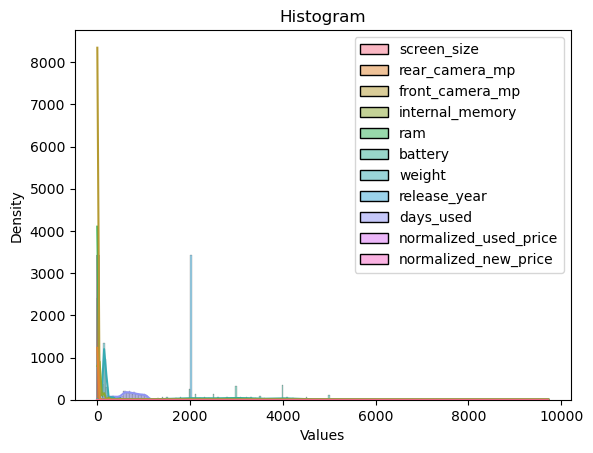

In [22]:
a = sns.histplot(df,kde = True, color = 'skyblue')
plt.title('Histogram')
plt.xlabel('Values')
plt.ylabel('Density')
plt.show()

# Distribution Plot

<Axes: xlabel='battery', ylabel='Density'>

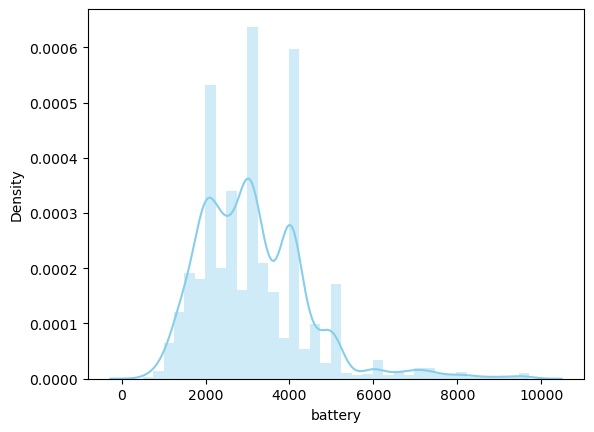

In [23]:
sns.distplot(df['battery'], kde = True, color = 'skyblue')
# KDE is a non-parametric way to estimate the probability density function of a random variable. 
#It provides a smooth curve that helps visualize the underlying distribution more smoothly.

# Duplicate Values

In [24]:
duplicates = df[df.duplicated('ram', keep=False)] # keep = False means Mark all duplicate values are True.

In [25]:
duplicates

,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.000000,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.000000,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.000000,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.000000,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.000000,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3449,Asus,Android,15.34,yes,no,9.460208,8.0,64.0,6.0,5000.0,190.0,2019,232,4.492337,6.483872
3450,Asus,Android,15.24,yes,no,13.000000,8.0,128.0,8.0,4000.0,200.0,2018,541,5.037732,6.251538
3451,Alcatel,Android,15.80,yes,no,13.000000,5.0,32.0,3.0,4000.0,165.0,2020,201,4.357350,4.528829
3452,Alcatel,Android,15.80,yes,no,13.000000,5.0,32.0,2.0,4000.0,160.0,2020,149,4.349762,4.624188


In [26]:
count_dup = duplicates['ram'].value_counts() 

In [27]:
count_dup

ram
4.00     2802
6.00      154
8.00      130
2.00       90
0.25       83
3.00       81
1.00       34
12.00      18
0.03       16
0.02       14
0.50        9
Name: count, dtype: int64

# Scatter Plot

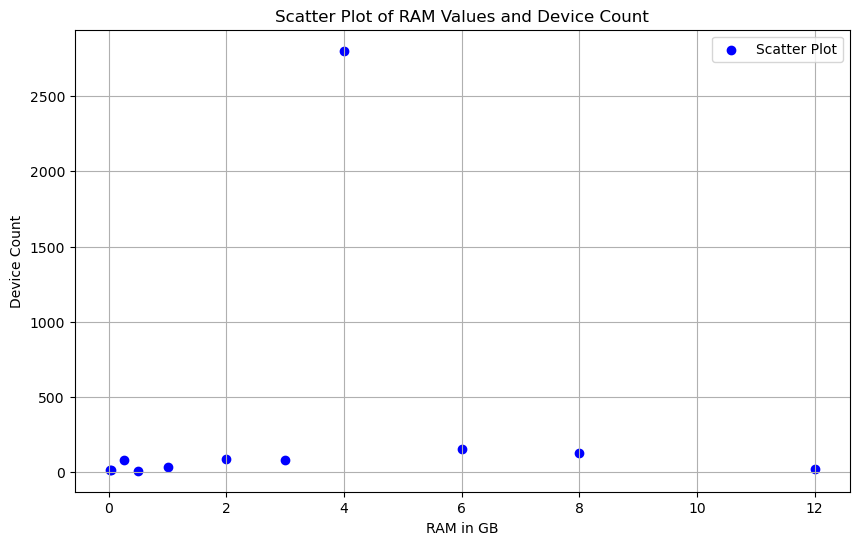

In [28]:
count_dup = duplicates['ram'].value_counts()

labels = count_dup.index
counts = count_dup.values

plt.figure(figsize=(10, 6))
plt.scatter(labels, counts, color='blue', label='Scatter Plot')
plt.xlabel('RAM in GB')
plt.ylabel('Device Count')
plt.title('Scatter Plot of RAM Values and Device Count')
plt.legend()
plt.grid()

plt.show()

In [29]:
Observation : 
    2802 devices have 4 GB RAM 
    9 devices have 0.50 GB RAM
    Only 18 devices have 12 GB which highest capacity RAM

SyntaxError: invalid syntax (969391625.py, line 1)

In [30]:
highest_capacity_ram = df[df['ram'] == 12.00]
highest_capacity_ram

,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
44,Huawei,Android,16.59,yes,yes,13.000000,16.0,512.0,12.0,4500.0,198.0,2019,289,5.674182,7.438007
109,Motorola,Android,15.42,yes,yes,9.460208,25.0,256.0,12.0,5000.0,203.0,2020,220,5.186883,7.090785
120,OnePlus,Android,16.94,yes,yes,9.460208,16.0,256.0,12.0,4085.0,206.0,2019,458,5.713403,6.686161
198,Xiaomi,Android,20.12,yes,yes,12.000000,20.0,512.0,12.0,4050.0,241.0,2019,478,6.619433,7.823342
263,Huawei,Android,16.59,yes,yes,13.000000,16.0,512.0,12.0,4500.0,198.0,2019,488,5.995954,7.439289
328,Motorola,Android,15.42,yes,yes,9.460208,25.0,256.0,12.0,5000.0,203.0,2020,188,5.639813,7.087983
339,OnePlus,Android,16.94,yes,yes,9.460208,16.0,256.0,12.0,4085.0,206.0,2019,280,5.079850,6.685761
372,Samsung,Android,15.32,yes,yes,12.000000,10.0,256.0,12.0,3500.0,168.0,2019,190,4.997685,7.003629
3250,Oppo,Android,15.37,yes,yes,9.460208,32.0,256.0,12.0,4025.0,171.0,2020,227,5.447728,6.232743
3252,Oppo,Android,15.42,yes,yes,9.460208,32.0,256.0,12.0,4260.0,217.0,2020,193,5.742009,6.840536


In [31]:
lowest_capacity_ram= df[df['ram'] == 0.02]
lowest_capacity_ram

,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
116,Nokia,Others,5.18,no,no,0.30,0.0,0.06,0.02,1200.0,88.2,2020,266,3.370738,3.699077
2044,Nokia,Others,5.18,yes,no,2.00,0.0,0.10,0.02,1100.0,117.0,2018,417,3.916015,4.505681
2049,Nokia,Others,5.18,yes,no,2.00,0.0,0.06,0.02,1200.0,88.1,2018,582,3.559909,4.611252
2052,Nokia,Others,5.18,no,no,2.00,0.0,0.10,0.02,1200.0,88.2,2017,680,3.602504,4.256747
2057,Nokia,Others,5.18,no,no,2.00,0.0,0.10,0.02,1000.0,160.0,2017,554,3.772761,4.098669
2060,Nokia,Others,5.28,no,no,2.00,0.0,0.06,0.02,1200.0,91.8,2015,867,2.934920,4.219655
2062,Nokia,Others,5.18,no,no,2.00,0.0,0.10,0.02,1100.0,79.0,2015,1012,3.199897,3.735763
2065,Nokia,Others,5.18,no,no,0.30,0.0,0.06,0.02,1100.0,78.6,2015,682,2.935451,3.401197
2074,Nokia,Others,5.28,no,no,2.00,0.0,0.10,0.02,1200.0,99.8,2014,631,3.367296,3.914021
2084,Nokia,Others,5.18,no,no,2.00,0.0,0.10,0.02,1830.0,83.6,2014,565,3.072230,3.712352


In [32]:
Android_data = df[df['os'] == 'Android']

In [33]:
Android_data

,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.000000,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.000000,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.000000,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.000000,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.000000,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3449,Asus,Android,15.34,yes,no,9.460208,8.0,64.0,6.0,5000.0,190.0,2019,232,4.492337,6.483872
3450,Asus,Android,15.24,yes,no,13.000000,8.0,128.0,8.0,4000.0,200.0,2018,541,5.037732,6.251538
3451,Alcatel,Android,15.80,yes,no,13.000000,5.0,32.0,3.0,4000.0,165.0,2020,201,4.357350,4.528829
3452,Alcatel,Android,15.80,yes,no,13.000000,5.0,32.0,2.0,4000.0,160.0,2020,149,4.349762,4.624188


In [34]:
Android_data.os.count()

3203

In [35]:
IOS_data = df[df['os'] == 'iOS']

In [36]:
IOS_data

,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
391,Apple,iOS,27.94,yes,no,12.0,7.0,64.0,4.0,7812.0,468.0,2018,601,5.359836,6.779604
392,Apple,iOS,18.01,yes,no,8.0,1.2,16.0,2.0,5124.0,299.0,2015,827,4.562680,5.891810
642,Apple,iOS,25.53,yes,no,8.0,7.0,64.0,4.0,3969.0,456.0,2019,496,4.937061,6.310082
643,Apple,iOS,18.01,yes,no,8.0,7.0,64.0,4.0,5124.0,300.5,2019,250,4.794633,6.110158
644,Apple,iOS,30.71,yes,no,12.0,7.0,1024.0,4.0,9720.0,631.0,2018,543,5.808022,7.003847
645,Apple,iOS,27.94,yes,no,12.0,7.0,1024.0,4.0,7812.0,468.0,2018,525,6.158969,6.778899
646,Apple,iOS,15.37,yes,no,12.0,7.0,64.0,4.0,3174.0,208.0,2018,583,5.570594,7.131155
647,Apple,iOS,12.90,yes,no,12.0,7.0,64.0,4.0,2658.0,177.0,2018,641,5.583459,7.047795
648,Apple,iOS,15.27,yes,no,12.0,7.0,64.0,4.0,2942.0,194.0,2018,673,5.492650,6.745213
649,Apple,iOS,23.04,yes,no,8.0,1.2,32.0,4.0,5493.0,469.0,2018,673,4.923478,5.859075


In [37]:
IOS_data.os.count()

36

In [38]:
Windows_data = df[df['os'] == 'Windows']

In [39]:
Windows_data

,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
428,Acer,Windows,12.83,yes,no,21.0,8.0,32.0,4.0,2870.0,150.0,2015,824,4.590970,5.391216
438,Acer,Windows,10.16,no,no,5.0,2.0,16.0,4.0,1300.0,119.0,2015,697,3.755369,4.377768
603,Others,Windows,10.16,no,no,5.0,0.3,16.0,4.0,1420.0,110.0,2014,706,3.276390,4.482890
604,Others,Windows,12.70,no,no,8.0,2.0,32.0,4.0,2000.0,156.2,2014,643,3.893248,5.129425
605,Others,Windows,10.34,no,no,8.0,2.0,32.0,4.0,1750.0,98.9,2014,1085,3.971989,5.079726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2300,Others,Windows,10.16,no,no,5.0,0.3,16.0,4.0,2500.0,154.0,2015,930,3.740285,4.089667
2556,Samsung,Windows,12.70,yes,no,13.0,2.0,16.0,4.0,2600.0,135.8,2014,851,4.673483,6.090857
2613,Samsung,Windows,12.12,yes,no,8.0,1.2,16.0,4.0,2000.0,144.0,2013,1080,4.569232,5.736508
2648,Samsung,Windows,10.16,yes,no,5.0,1.2,32.0,4.0,2100.0,125.0,2013,713,3.978934,5.293857


In [40]:
Windows_data.os.count()

65

In [41]:
Others_data = df[df['os'] == 'Others']
Others_data

,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
78,LG,Others,5.28,yes,no,2.00,13.0,8.00,1.00,1470.0,127.0,2020,343,3.875566,5.015689
113,Nokia,Others,5.18,no,no,0.30,0.0,0.10,0.03,1020.0,90.5,2020,272,2.910174,3.399863
116,Nokia,Others,5.18,no,no,0.30,0.0,0.06,0.02,1200.0,88.2,2020,266,3.370738,3.699077
297,LG,Others,5.28,yes,no,2.00,13.0,8.00,1.00,1470.0,127.0,2020,202,3.758406,5.021377
332,Nokia,Others,5.18,no,no,0.30,0.0,0.06,0.03,1020.0,90.5,2020,322,2.519308,3.386422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2796,Others,Others,5.18,no,no,1.30,2.0,128.00,0.25,2100.0,98.0,2014,713,3.335058,4.246064
2802,Others,Others,5.13,no,no,2.00,2.0,128.00,0.25,2100.0,110.0,2014,927,3.780319,4.107590
3170,ZTE,Others,10.16,no,no,3.15,5.0,16.00,4.00,1400.0,125.0,2014,1007,3.764451,4.244344
3246,Nokia,Others,5.28,yes,no,2.00,0.0,0.06,0.03,1500.0,118.0,2019,339,3.417071,4.085304


# Pie Chart

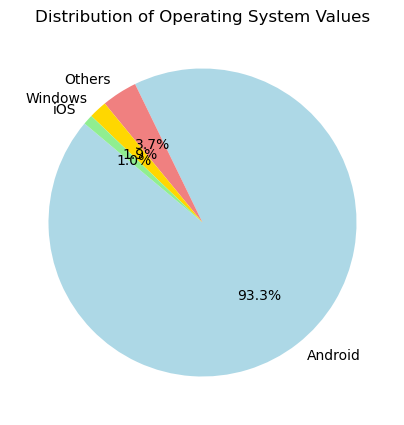

In [42]:
count_phones = df['os'].value_counts()


labels = count_phones.index
sizes = count_phones.values
colors = ['lightblue', 'lightcoral', 'gold', 'lightgreen']

plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Operating System Values')
plt.show()

# Bar Plot

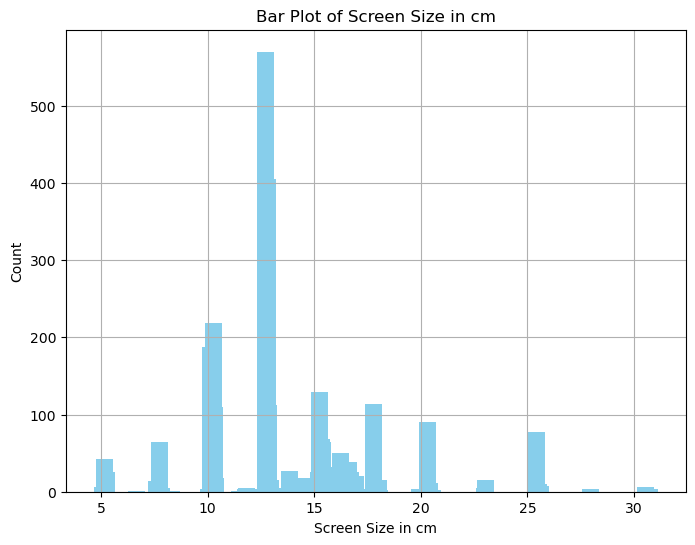

In [43]:
column_name = 'Screen Size in cm'
data = df['screen_size'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(data.index, data.values, color='skyblue')
plt.title(f'Bar Plot of {column_name}')
plt.xlabel(column_name)
plt.ylabel('Count')
plt.grid()
plt.show()

In [44]:
data_4g = df[df['4g'] == 'yes']
data_4g

,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.000000,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.000000,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.000000,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.000000,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.000000,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3449,Asus,Android,15.34,yes,no,9.460208,8.0,64.0,6.0,5000.0,190.0,2019,232,4.492337,6.483872
3450,Asus,Android,15.24,yes,no,13.000000,8.0,128.0,8.0,4000.0,200.0,2018,541,5.037732,6.251538
3451,Alcatel,Android,15.80,yes,no,13.000000,5.0,32.0,3.0,4000.0,165.0,2020,201,4.357350,4.528829
3452,Alcatel,Android,15.80,yes,no,13.000000,5.0,32.0,2.0,4000.0,160.0,2020,149,4.349762,4.624188


In [45]:
data_4g1 = df[df['4g'] == 'no']
data_4g1

,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
21,Others,Android,20.32,no,no,8.00,0.3,16.0,1.0,5680.0,453.6,2013,933,4.452136,5.484382
57,Huawei,Android,10.16,no,no,5.00,2.0,16.0,4.0,1700.0,136.1,2014,666,3.579344,4.703113
58,Huawei,Android,17.78,no,no,3.15,0.3,8.0,1.0,4100.0,350.0,2013,819,3.982295,5.016551
65,Lava,Android,12.70,no,no,5.00,0.3,8.0,0.5,3000.0,147.6,2016,819,3.495598,4.113003
67,Lenovo,Android,25.43,no,no,8.00,5.0,64.0,4.0,7000.0,580.0,2019,419,5.214881,5.775141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3180,ZTE,Android,10.29,no,no,8.00,0.3,16.0,4.0,2000.0,146.0,2013,939,3.617920,4.710971
3181,ZTE,Android,12.70,no,no,8.00,1.3,16.0,4.0,2500.0,163.0,2013,829,4.008242,5.296816
3182,ZTE,Android,10.16,no,no,5.00,0.3,16.0,4.0,1600.0,140.0,2013,885,3.674273,5.012966
3184,ZTE,Android,10.16,no,no,3.15,1.0,16.0,4.0,1600.0,140.0,2013,782,3.745023,4.860975


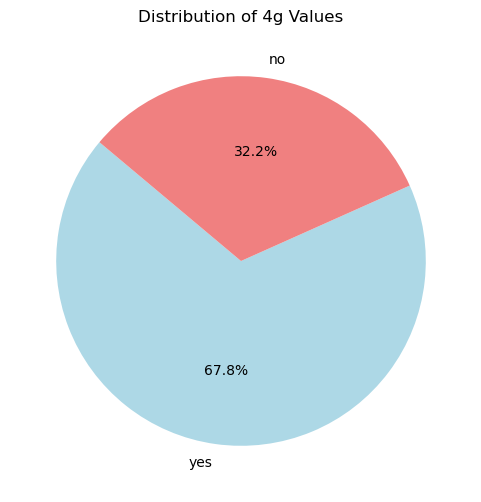

In [46]:
count_4g = df['4g'].value_counts()

labels = count_4g.index
sizes = count_4g.values
colors = ['lightblue', 'lightcoral']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of 4g Values')
plt.show()

In [47]:
data_5g = df[df['5g'] == 'yes']
data_5g

,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
12,Honor,Android,16.69,yes,yes,13.0,16.0,128.0,8.0,4100.0,206.0,2019,537,5.383256,6.213968
27,Huawei,Android,15.37,yes,yes,10.5,16.0,128.0,6.0,4000.0,192.0,2020,91,4.905497,5.520380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3420,Samsung,Android,15.47,yes,yes,8.0,13.0,128.0,12.0,5000.0,222.0,2020,197,5.623042,6.792120
3422,Samsung,Android,15.42,yes,yes,8.0,13.0,128.0,12.0,4500.0,188.0,2020,190,5.470967,6.566110
3424,Samsung,Android,15.29,yes,yes,8.0,13.0,128.0,12.0,4000.0,163.0,2020,124,5.486165,6.522078
3436,Samsung,Android,17.86,yes,yes,12.0,9.0,512.0,12.0,4235.0,263.0,2019,434,5.573750,7.333016


In [48]:
data_5g1 = df[df['5g'] == 'no']
data_5g1

,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.000000,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
4,Honor,Android,15.32,yes,no,13.000000,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837
5,Honor,Android,16.23,yes,no,13.000000,8.0,64.0,4.0,4000.0,176.0,2020,223,4.413889,5.060694
6,Honor,Android,13.84,yes,no,8.000000,5.0,32.0,2.0,3020.0,144.0,2020,234,3.878259,4.518958
7,Honor,Android,15.77,yes,no,13.000000,8.0,64.0,4.0,3400.0,164.0,2020,219,4.729421,5.188726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3449,Asus,Android,15.34,yes,no,9.460208,8.0,64.0,6.0,5000.0,190.0,2019,232,4.492337,6.483872
3450,Asus,Android,15.24,yes,no,13.000000,8.0,128.0,8.0,4000.0,200.0,2018,541,5.037732,6.251538
3451,Alcatel,Android,15.80,yes,no,13.000000,5.0,32.0,3.0,4000.0,165.0,2020,201,4.357350,4.528829
3452,Alcatel,Android,15.80,yes,no,13.000000,5.0,32.0,2.0,4000.0,160.0,2020,149,4.349762,4.624188


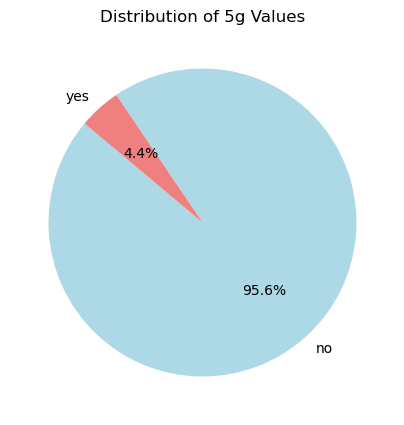

In [49]:
count_5g = df['5g'].value_counts()


labels = count_5g.index
sizes = count_5g.values
colors = ['lightblue', 'lightcoral']

plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of 5g Values')
plt.show()

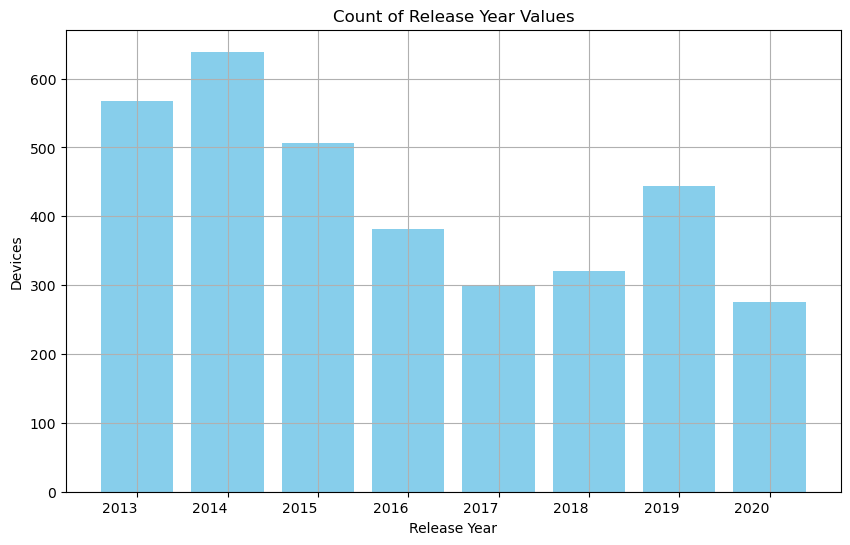

In [50]:
count_dup = duplicates['release_year'].value_counts()

labels = count_dup.index
counts = count_dup.values

plt.figure(figsize=(10, 6))
plt.bar(labels, counts, color='skyblue')
plt.xlabel('Release Year')
plt.ylabel('Devices')
plt.title('Count of Release Year Values')
plt.xticks(ha='right') 
plt.grid()
plt.show()

In [51]:
z_scores = stats.zscore(df['weight'])
print('Z-score is : ',z_scores)

Z-score is :  0      -0.418656
1       0.342115
2       0.342115
3       3.373845
4       0.024181
          ...   
3449    0.080955
3450    0.194502
3451   -0.202915
3452   -0.259689
3453   -0.168851
Name: weight, Length: 3432, dtype: float64


In [52]:
data_no_outliers = df[(np.abs(z_scores) < 3)]
data_no_outliers

,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.000000,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.000000,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.000000,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
4,Honor,Android,15.32,yes,no,13.000000,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837
5,Honor,Android,16.23,yes,no,13.000000,8.0,64.0,4.0,4000.0,176.0,2020,223,4.413889,5.060694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3449,Asus,Android,15.34,yes,no,9.460208,8.0,64.0,6.0,5000.0,190.0,2019,232,4.492337,6.483872
3450,Asus,Android,15.24,yes,no,13.000000,8.0,128.0,8.0,4000.0,200.0,2018,541,5.037732,6.251538
3451,Alcatel,Android,15.80,yes,no,13.000000,5.0,32.0,3.0,4000.0,165.0,2020,201,4.357350,4.528829
3452,Alcatel,Android,15.80,yes,no,13.000000,5.0,32.0,2.0,4000.0,160.0,2020,149,4.349762,4.624188


In [53]:
skewness_value = skew(df['weight'])
print(f'Skewness: {skewness_value}')

Skewness: 3.229740230773384


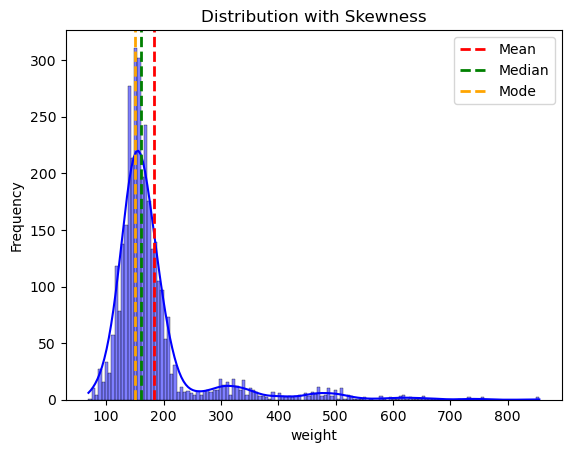

In [54]:
sns.histplot(df['weight'], kde=True, color='blue')

plt.axvline(df['weight'].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(df['weight'].median(), color='green', linestyle='dashed', linewidth=2, label='Median')
plt.axvline(df['weight'].mode()[0], color='orange', linestyle='dashed', linewidth=2, label='Mode')

plt.xlabel('weight')
plt.ylabel('Frequency')
plt.title('Distribution with Skewness')
plt.legend()

plt.show()

Original Skewness: 1.8638133860049406
Skewness after Log Transformation: -1.0522355286055485


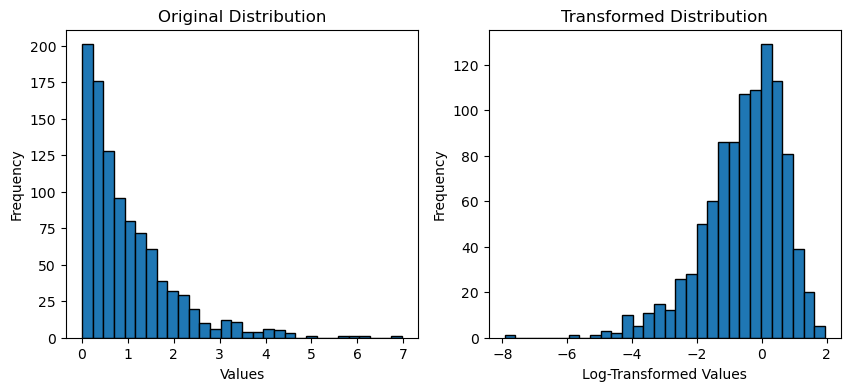

In [55]:
data = np.random.exponential(size=1000)  

original_skewness = np.mean((data - np.mean(data))**3) / np.std(data)**3
print(f'Original Skewness: {original_skewness}')

transformed_data = np.log(data)

transformed_skewness = np.mean((transformed_data - np.mean(transformed_data))**3) / np.std(transformed_data)**3
print(f'Skewness after Log Transformation: {transformed_skewness}')

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.hist(data, bins=30, edgecolor='black')
plt.title('Original Distribution')
plt.xlabel('Values')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(transformed_data, bins=30, edgecolor='black')
plt.title('Transformed Distribution')
plt.xlabel('Log-Transformed Values')
plt.ylabel('Frequency')

plt.show()

In [56]:
Q1 = df['weight'].quantile(0.25)
Q3 = df['weight'].quantile(0.75)

IQR = Q3 - Q1

threshold = 1.5

df_no_outliers = df[(df['weight'] >= (Q1 - threshold * IQR)) & (df['weight'] <= (Q3 + threshold * IQR))]

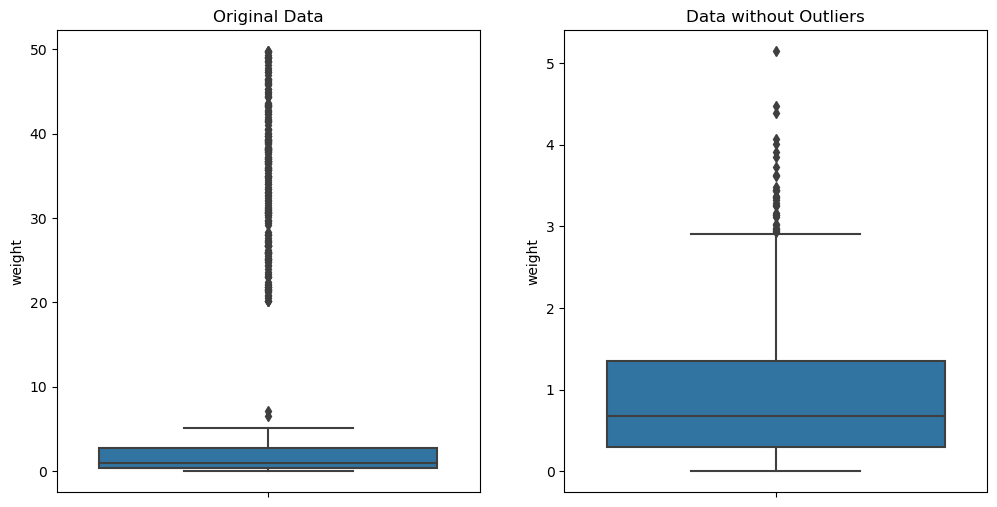

In [57]:
data = {'weight': np.concatenate([np.random.exponential(size=800), np.random.uniform(low=20, high=50, size=200)])}
df = pd.DataFrame(data)

Q1 = df['weight'].quantile(0.25)
Q3 = df['weight'].quantile(0.75)
IQR = Q3 - Q1

threshold = 1.5

df_no_outliers = df[(df['weight'] >= (Q1 - threshold * IQR)) & (df['weight'] <= (Q3 + threshold * IQR))]

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=df['weight'])
plt.title("Original Data")

plt.subplot(1, 2, 2)
sns.boxplot(y=df_no_outliers['weight'])
plt.title("Data without Outliers")

plt.show()

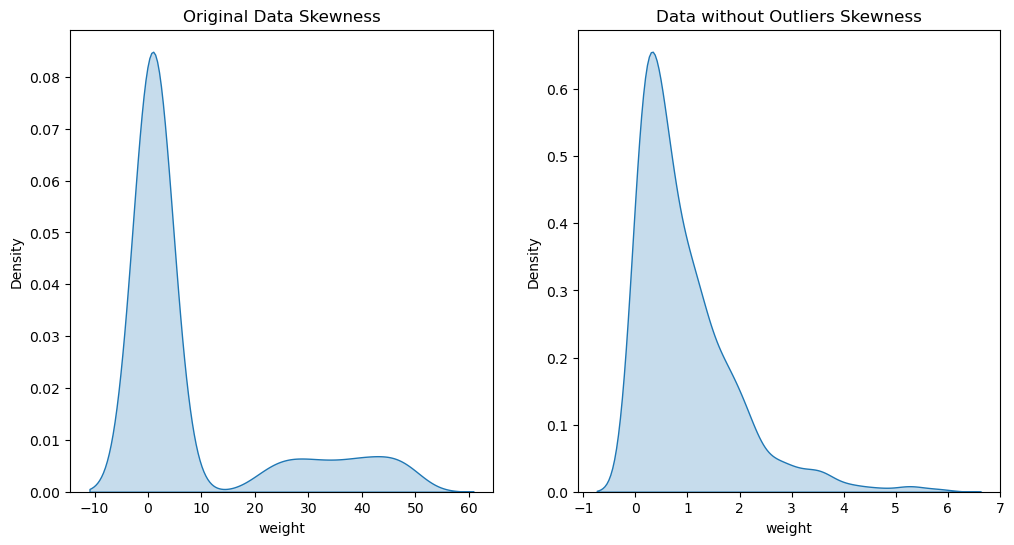

In [58]:
data = {'weight': np.concatenate([np.random.exponential(size=800), np.random.uniform(low=20, high=50, size=200)])}
df = pd.DataFrame(data)

Q1 = df['weight'].quantile(0.25)
Q3 = df['weight'].quantile(0.75)
IQR = Q3 - Q1

threshold = 1.5

df_no_outliers = df[(df['weight'] >= (Q1 - threshold * IQR)) & (df['weight'] <= (Q3 + threshold * IQR))]

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.kdeplot(df['weight'], fill=True)
plt.title("Original Data Skewness")

plt.subplot(1, 2, 2)
sns.kdeplot(df_no_outliers['weight'], fill=True)
plt.title("Data without Outliers Skewness")

plt.show()

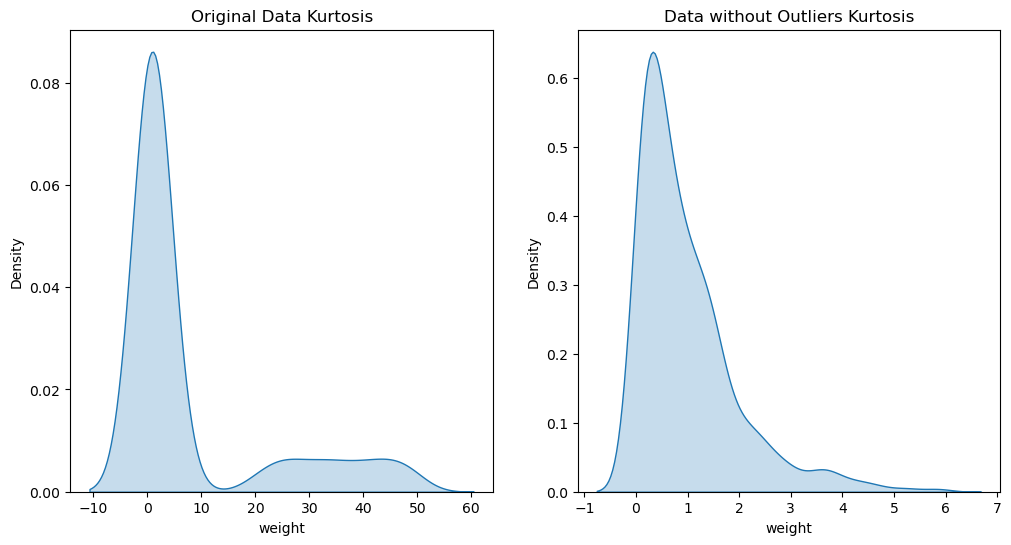

In [59]:
data = {'weight': np.concatenate([np.random.exponential(size=800), np.random.uniform(low=20, high=50, size=200)])}
df = pd.DataFrame(data)

Q1 = df['weight'].quantile(0.25)
Q3 = df['weight'].quantile(0.75)
IQR = Q3 - Q1

threshold = 1.5

df_no_outliers = df[(df['weight'] >= (Q1 - threshold * IQR)) & (df['weight'] <= (Q3 + threshold * IQR))]

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.kdeplot(df['weight'], fill=True)
plt.title("Original Data Kurtosis")

plt.subplot(1, 2, 2)
sns.kdeplot(df_no_outliers['weight'], fill=True)
plt.title("Data without Outliers Kurtosis")

plt.show()

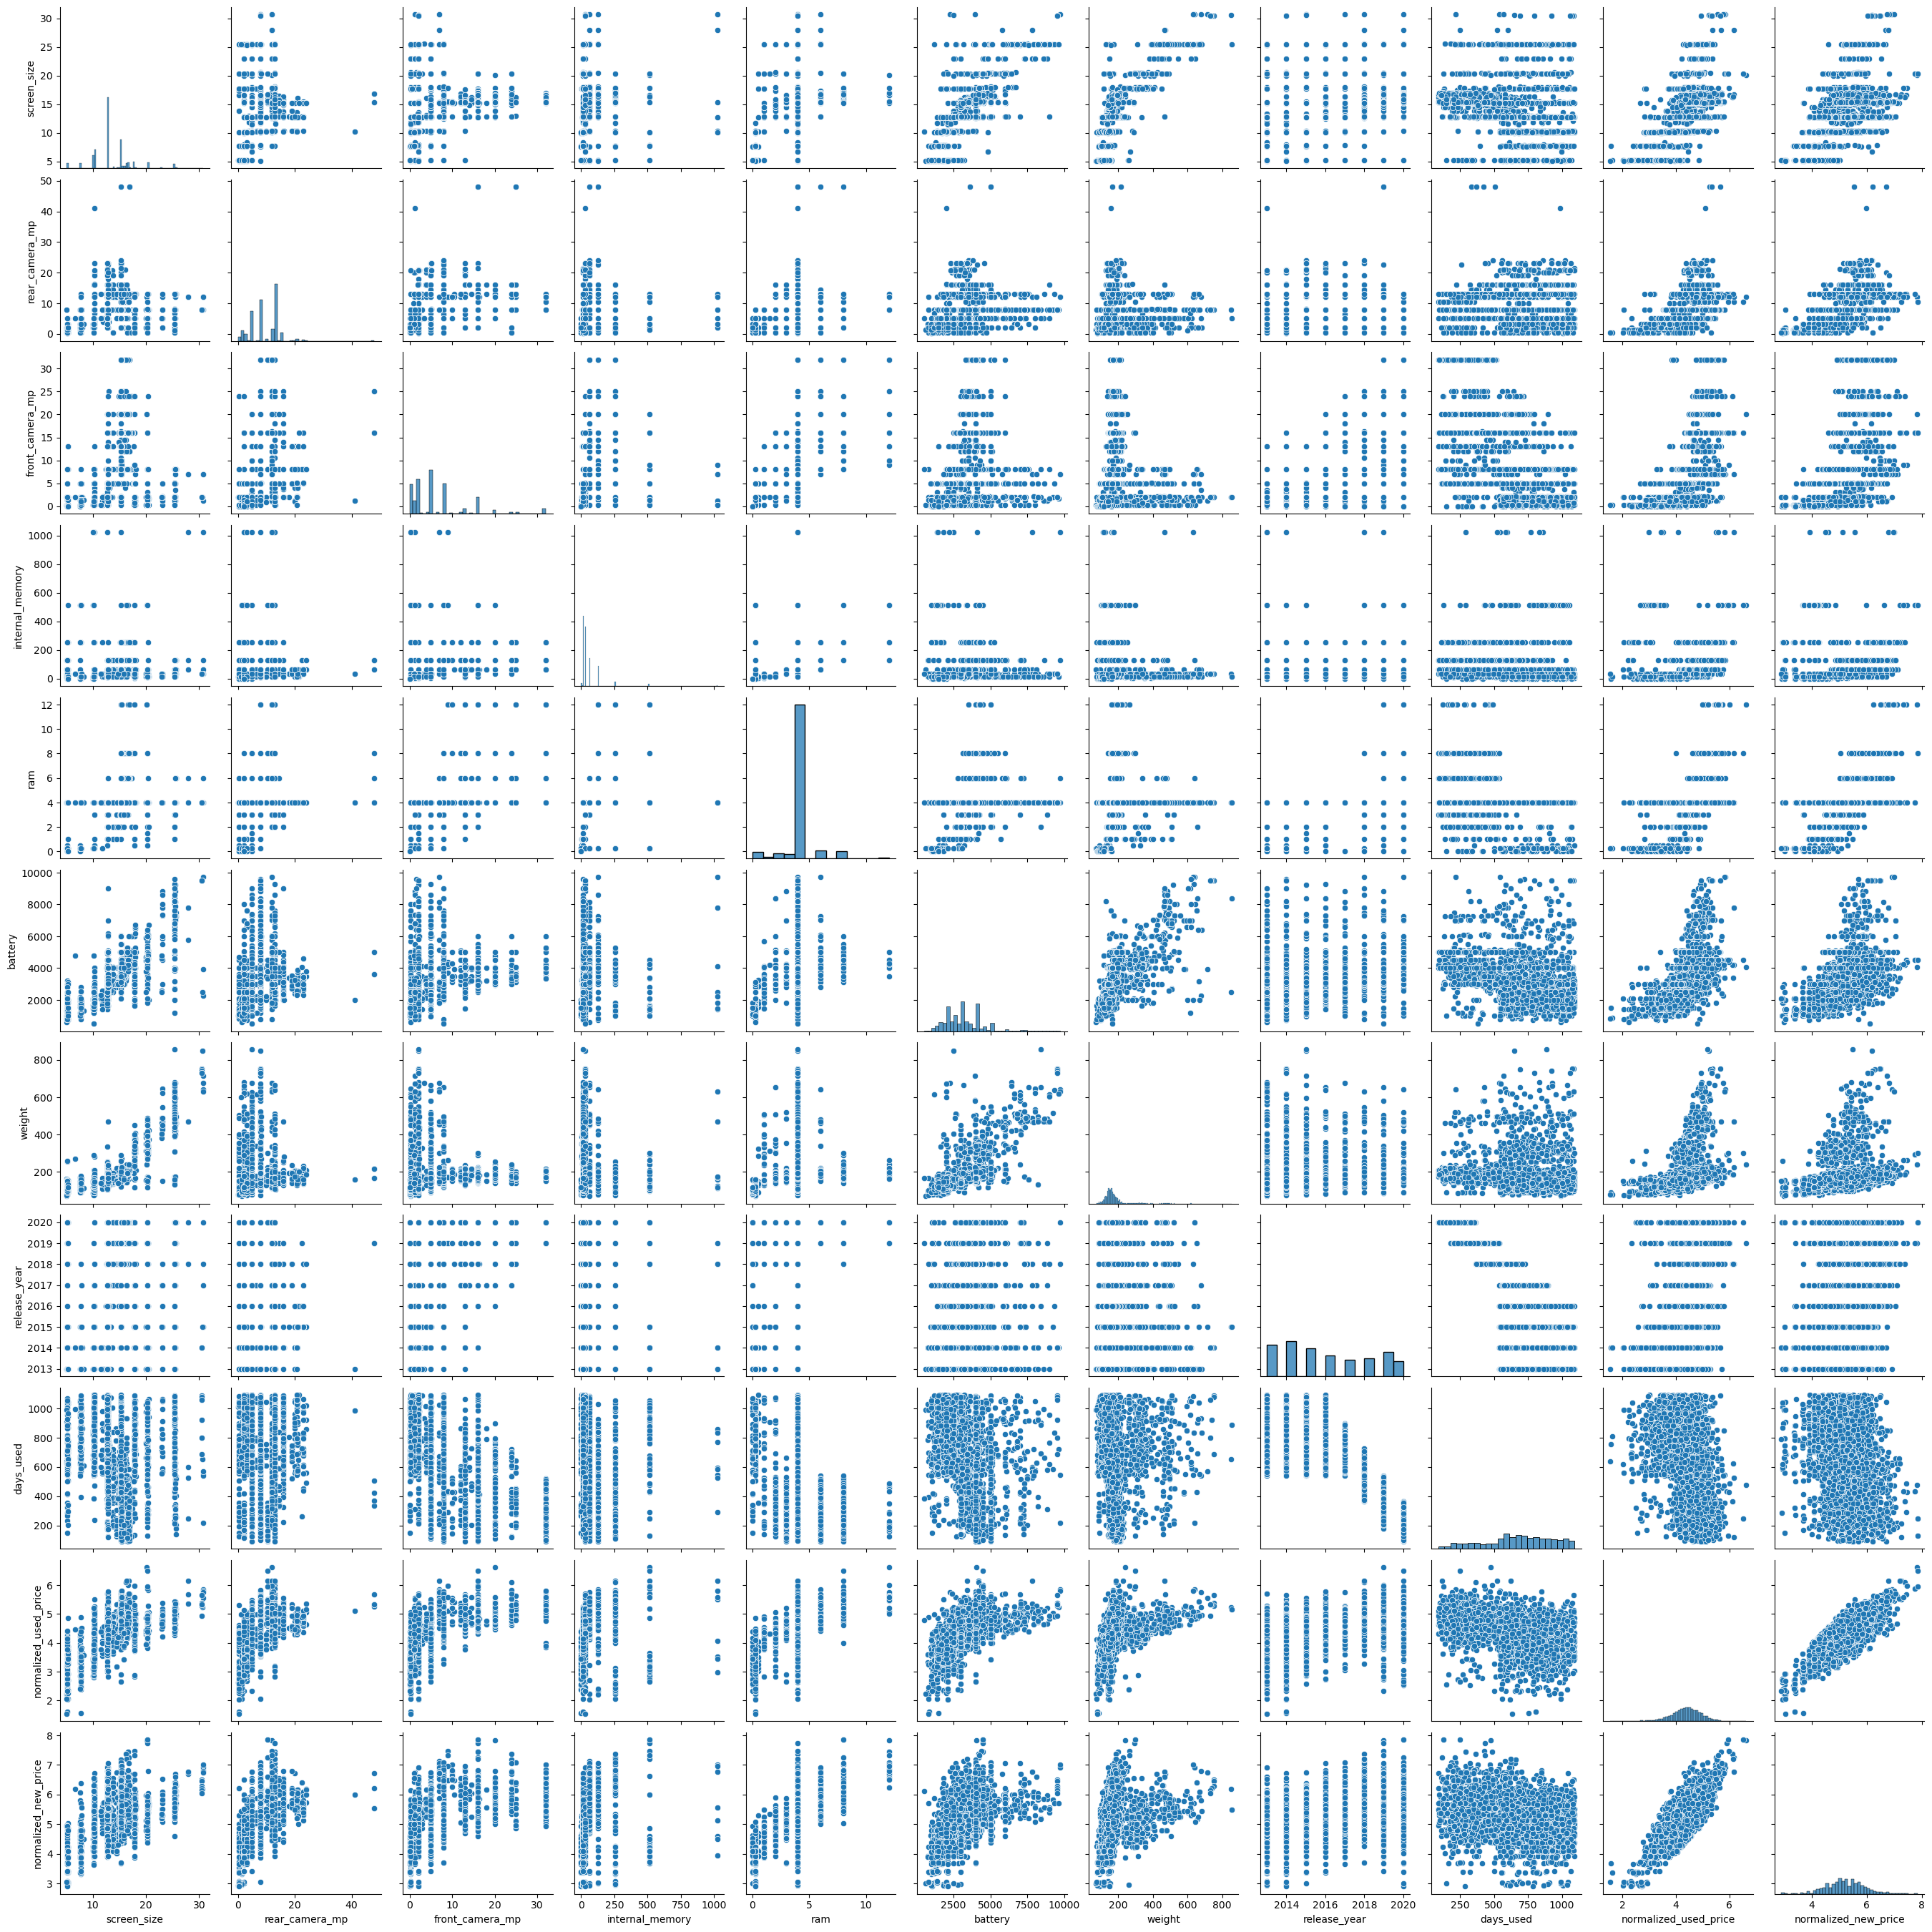

In [63]:
sns.pairplot(df)

In [64]:
z_scores1 = stats.zscore(df['normalized_used_price'])
print('Z-score is : ',z_scores1)

Z-score is :  0      -0.097040
1       1.354188
2       1.267554
3       1.308827
4       0.042937
          ...   
3449    0.216744
3450    1.142981
3451   -0.012504
3452   -0.025390
3453   -0.395005
Name: normalized_used_price, Length: 3454, dtype: float64


In [65]:
z_scores2 = stats.zscore(df['normalized_new_price'])
print('Z-score is : ',z_scores2)

Z-score is :  0      -0.757832
1       0.418281
2       0.953164
3       0.582051
4      -0.417343
          ...   
3449    1.829839
3450    1.489940
3451   -1.030343
3452   -0.890834
3453   -1.394383
Name: normalized_new_price, Length: 3454, dtype: float64


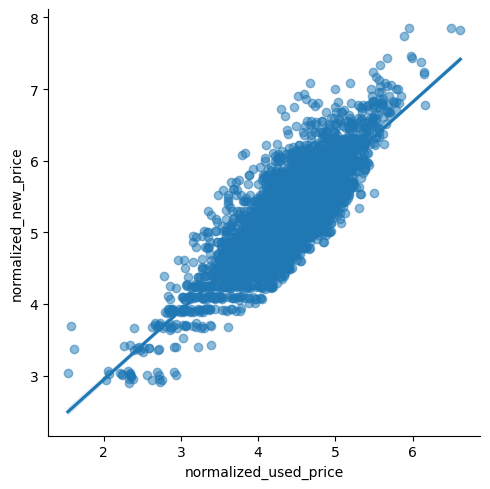

In [66]:
sns.lmplot(x = 'normalized_used_price', y = 'normalized_new_price', data = df, scatter_kws = {'alpha' : 0.5})

In [67]:
df_sorted_asc = df.sort_values(by='normalized_used_price')
df_sorted_asc

,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
885,Others,Others,5.08,no,no,0.3,0.3,32.0,0.25,820.0,80.0,2013,636,1.536867,3.042139
323,Micromax,Android,7.75,no,no,0.3,0.3,0.5,0.25,1500.0,89.0,2014,757,1.572774,3.686126
533,Alcatel,Others,5.18,no,no,0.3,0.3,16.0,0.25,850.0,77.9,2014,809,1.617406,3.371769
2320,Others,Others,5.18,no,no,0.3,2.0,64.0,0.25,2100.0,150.0,2014,617,2.033398,2.937043
2533,Samsung,Others,5.08,no,no,8.0,2.0,16.0,4.00,800.0,75.0,2014,990,2.052841,3.057298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2135,Oppo,Android,16.31,yes,no,13.0,16.0,512.0,4.00,3400.0,186.0,2018,623,6.143348,7.209651
34,Huawei,Android,16.71,yes,yes,10.5,16.0,256.0,8.00,4200.0,226.0,2020,120,6.153456,7.244220
645,Apple,iOS,27.94,yes,no,12.0,7.0,1024.0,4.00,7812.0,468.0,2018,525,6.158969,6.778899
3207,Huawei,Android,20.32,yes,yes,10.5,16.0,512.0,8.00,4500.0,300.0,2020,248,6.500448,7.847841


In [68]:
df_sorted_asc.head(10)

,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
885,Others,Others,5.08,no,no,0.3,0.3,32.0,0.25,820.0,80.0,2013,636,1.536867,3.042139
323,Micromax,Android,7.75,no,no,0.3,0.3,0.5,0.25,1500.0,89.0,2014,757,1.572774,3.686126
533,Alcatel,Others,5.18,no,no,0.3,0.3,16.0,0.25,850.0,77.9,2014,809,1.617406,3.371769
2320,Others,Others,5.18,no,no,0.3,2.0,64.0,0.25,2100.0,150.0,2014,617,2.033398,2.937043
2533,Samsung,Others,5.08,no,no,8.0,2.0,16.0,4.00,800.0,75.0,2014,990,2.052841,3.057298
953,Celkon,Others,5.28,no,no,1.3,0.3,256.0,0.25,1400.0,140.0,2013,561,2.063058,3.025776
884,Others,Others,5.08,no,no,1.3,0.3,128.0,0.25,820.0,80.0,2013,905,2.212660,3.041184
898,Others,Others,5.08,no,no,1.3,0.3,64.0,0.25,620.0,69.0,2013,990,2.236445,3.007167
954,Celkon,Others,5.23,no,no,1.3,0.3,256.0,0.25,1400.0,140.0,2013,796,2.242835,3.023347
1929,Micromax,Others,5.28,no,no,0.3,0.3,16.0,4.00,2000.0,92.0,2013,946,2.267994,3.406848


In [69]:
df_sorted_asc1 = df.sort_values(by='normalized_new_price')
df_sorted_asc1

,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
2324,Others,Others,5.18,no,no,0.30,2.0,32.00,0.25,2100.0,150.0,2014,789,2.323368,2.901422
114,Nokia,Others,5.18,no,no,0.30,0.0,0.06,NaN,1020.0,91.3,2020,288,2.729159,2.911263
2320,Others,Others,5.18,no,no,0.30,2.0,64.00,0.25,2100.0,150.0,2014,617,2.033398,2.937043
1904,Micromax,Others,5.16,no,no,0.30,0.3,16.00,4.00,1800.0,118.0,2013,868,2.753024,2.940748
618,Others,Others,5.18,no,no,0.08,2.0,16.00,4.00,1000.0,80.0,2014,1008,2.630449,2.942331
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2358,Samsung,Android,17.86,yes,no,12.00,9.0,512.00,4.00,4380.0,263.0,2019,428,5.978658,7.468045
1262,Huawei,Android,20.32,yes,no,13.00,16.0,512.00,4.00,4500.0,295.0,2019,434,5.887797,7.741043
198,Xiaomi,Android,20.12,yes,yes,12.00,20.0,512.00,12.00,4050.0,241.0,2019,478,6.619433,7.823342
3348,Huawei,Android,20.32,yes,yes,10.50,16.0,512.00,8.00,4500.0,300.0,2020,129,5.959251,7.847841


In [70]:
df_sorted_asc1.head(10)

,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
2324,Others,Others,5.18,no,no,0.30,2.0,32.00,0.25,2100.0,150.0,2014,789,2.323368,2.901422
114,Nokia,Others,5.18,no,no,0.30,0.0,0.06,NaN,1020.0,91.3,2020,288,2.729159,2.911263
2320,Others,Others,5.18,no,no,0.30,2.0,64.00,0.25,2100.0,150.0,2014,617,2.033398,2.937043
1904,Micromax,Others,5.16,no,no,0.30,0.3,16.00,4.00,1800.0,118.0,2013,868,2.753024,2.940748
618,Others,Others,5.18,no,no,0.08,2.0,16.00,4.00,1000.0,80.0,2014,1008,2.630449,2.942331
1903,Micromax,Others,5.18,no,no,0.30,0.3,16.00,4.00,2800.0,260.0,2013,1037,2.383243,2.949688
952,Celkon,Others,5.18,no,no,1.30,0.3,256.00,0.25,1800.0,140.0,2013,586,2.333114,2.951780
1926,Micromax,Others,5.23,no,no,0.30,0.3,16.00,4.00,2000.0,118.0,2013,596,2.714695,2.955431
965,Celkon,Others,5.18,no,no,1.30,0.3,256.00,0.25,1800.0,140.0,2013,899,2.359910,2.977568
1898,Micromax,Others,5.28,no,no,0.30,2.0,16.00,4.00,3000.0,146.5,2014,664,2.351375,2.989211


# Load or Generate Data

In [97]:
cat_cols = ['device_brand','os','4g','5g']
encoder = OneHotEncoder(drop = 'first', sparse = False)
encoded_cols = pd.DataFrame(encoder.fit_transform(df[cat_cols]), columns = encoder.get_feature_names_out(cat_cols))

In [98]:
cat_cols1 = ['screen_size','rear_camera_mp','front_camera_mp','internal_memory','ram','battery','weight','release_year',
             'days_used','normalized_used_price']
encoder1 = StandardScaler()
standard_cols = pd.DataFrame(encoder1.fit_transform(df[cat_cols1]), columns = encoder1.get_feature_names_out(cat_cols1))

In [99]:
x = pd.concat([encoded_cols,standard_cols], axis = 1)
y = df['normalized_new_price']

# Split Data into Training and Testing Set

In [100]:
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size = 0.8, random_state = 42) # 42 set at a time

In [101]:
x_train

,device_brand_Alcatel,device_brand_Apple,device_brand_Asus,device_brand_BlackBerry,device_brand_Celkon,device_brand_Coolpad,device_brand_Gionee,device_brand_Google,device_brand_HTC,device_brand_Honor,...,screen_size,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price
3302,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.658964,0.540047,1.349615,0.108732,1.439773,0.662941,0.092309,1.319576,-0.931854,0.989498
2131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.397629,1.395740,1.922833,0.108732,-0.030964,0.046941,-0.350528,0.449576,-0.271380,0.934916
572,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.238550,0.753970,0.919701,-0.267125,-0.030964,-0.107059,-0.445908,0.884576,-0.734517,0.788270
3124,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.272867,1.395740,0.203178,-0.455053,-0.030964,-0.184059,-0.407302,-0.420424,0.493803,0.480065
2713,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.238550,-0.315646,-0.226736,-0.267125,-0.030964,-0.492059,-0.376644,-0.855424,0.538103,-0.427438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.033808,0.753970,0.919701,0.860447,-0.030964,1.432942,0.535146,0.884576,-0.472744,0.564231
1130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,-0.238550,0.753970,-0.226736,-0.267125,-0.030964,-0.107059,-0.236980,-0.855424,-0.025716,-0.386199
1294,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.397629,-0.315646,0.203178,0.860447,-0.030964,0.154741,-0.157496,0.449576,-0.428444,0.838120
860,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.272867,0.753970,-0.226736,-0.455053,-0.030964,-0.646059,-0.611688,-0.855424,1.146222,0.045128


In [102]:
y_train

3324    5.472229
2146    5.767133
575     5.395898
3146    5.127529
2728    5.252483
          ...   
1100    5.989412
1135    5.297517
1299    5.706844
863     5.563370
3196    5.709566
Name: normalized_new_price, Length: 2745, dtype: float64

# Create a Linear Regression Model

In [103]:
model = LinearRegression()

# Train the Model

In [104]:
model.fit(x_train, y_train)

LinearRegression()

In [105]:
model.coef_

array([-0.01804606,  0.7300145 ,  0.00811876,  0.07076426, -0.20602866,
       -0.03133006,  0.04042363,  0.37321618,  0.14524245, -0.16250014,
       -0.00785994, -0.33564817, -0.22055352,  0.1349437 , -0.21990278,
       -0.1012576 ,  0.01932673, -0.19467159, -0.13223842, -0.08311173,
        0.10157468,  0.21736106,  0.06929888,  0.02529324, -0.09090754,
       -0.22424105,  0.14982965,  0.06174723, -0.24358829,  0.03292971,
       -0.05942954, -0.18624477, -0.08788289, -0.18796876, -0.00667928,
       -0.06258604,  0.12423129,  0.26774169,  0.03239445,  0.06916135,
        0.01489565,  0.05269081,  0.07192952,  0.04727583, -0.06530555,
       -0.20345336, -0.02138842,  0.45829171])

In [106]:
cdf = pd.DataFrame(model.coef_, x.columns, columns = ['coef'])
cdf

,coef
device_brand_Alcatel,-0.018046
device_brand_Apple,0.730014
device_brand_Asus,0.008119
device_brand_BlackBerry,0.070764
device_brand_Celkon,-0.206029
device_brand_Coolpad,-0.031330
device_brand_Gionee,0.040424
device_brand_Google,0.373216
device_brand_HTC,0.145242
device_brand_Honor,-0.162500


# Make Predictions

In [107]:
y_pred = model.predict(x_test)

# Actual and Predicted Data

In [108]:
a = {'actual':y_test, 'prediction':y_pred}
pd.DataFrame(data=a)

,actual,prediction
1580,4.228438,4.363960
1957,4.489872,4.396655
3281,5.507281,5.939829
3166,4.096176,4.198515
1869,4.938423,4.926316
...,...,...
1335,5.299567,5.535421
2483,5.306335,5.351722
1094,6.309264,5.484360
1162,5.348345,5.655820


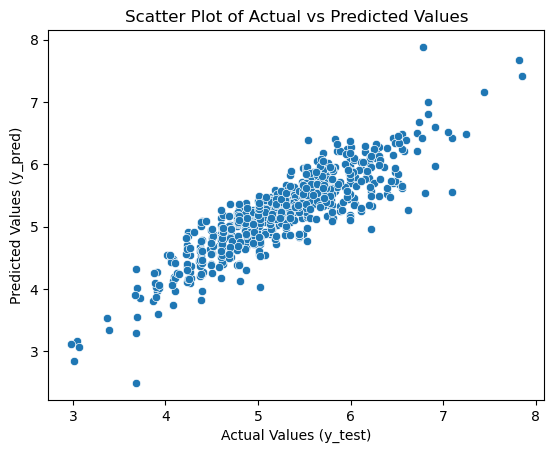

In [109]:
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.title('Scatter Plot of Actual vs Predicted Values')
plt.show()

In [110]:
r2 = r2_score(y_test, y_pred)
print('R2 Score : ',r2)

R2 Score :  0.7731314964499362


In [111]:
m_a_e = mean_absolute_error(y_test,y_pred)
print('Mean Absolute Error : ',m_a_e)

Mean Absolute Error :  0.25394503963029696


In [112]:
m_s_e = mean_squared_error(y_test,y_pred)
print('Mean Squared Error : ',m_s_e)

Mean Squared Error :  0.11215986262530579


In [113]:
RMSE = np.sqrt(m_s_e)
print('Root Mean Square Error :', RMSE)

Root Mean Square Error : 0.334902765926628


# Residuals

In [114]:
residuals = y_test - y_pred
residuals

1580   -0.135521
1957    0.093217
3281   -0.432548
3166   -0.102339
1869    0.012107
          ...   
1335   -0.235854
2483   -0.045387
1094    0.824903
1162   -0.307475
2510    0.180117
Name: normalized_new_price, Length: 687, dtype: float64

<Axes: xlabel='normalized_new_price', ylabel='Density'>

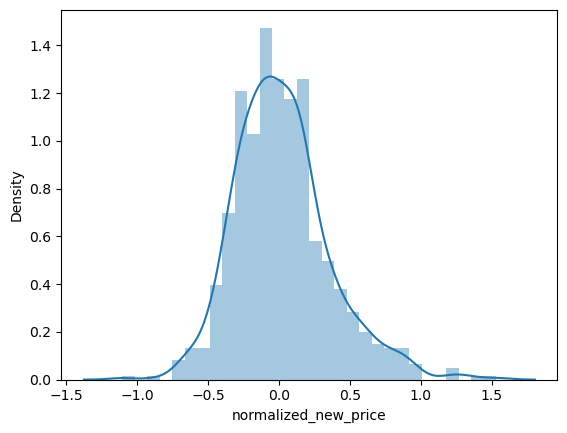

In [115]:
sns.distplot(residuals)

# Hyperparameter Tuning

In [133]:
initial_mse = mean_squared_error(y_test, y_pred)
print("Initial Mean Squared Error:", initial_mse)

param_grid = {
    'fit_intercept': [True, False]
}

grid_search = GridSearchCV(estimator=LinearRegression(), param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(x_test)

tuned_mse = mean_squared_error(y_test, y_pred_tuned)
print("Tuned Mean Squared Error:", tuned_mse)

r2 = r2_score(y_test, y_pred)
print('R2 Score : ',r2)

Initial Mean Squared Error: 0.14388590488647943
Best Hyperparameters: {'fit_intercept': True}
Tuned Mean Squared Error: 0.11215986262530579
R2 Score :  0.7089584530555821


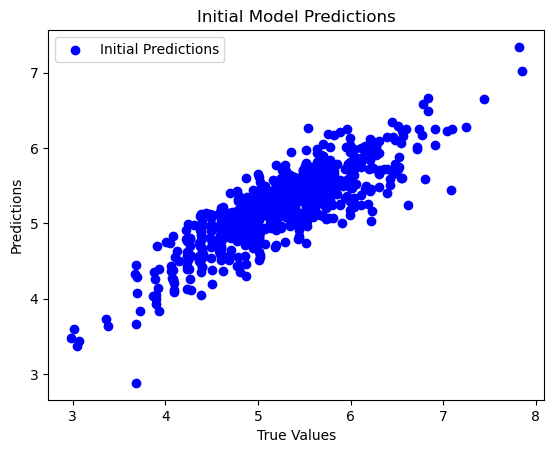

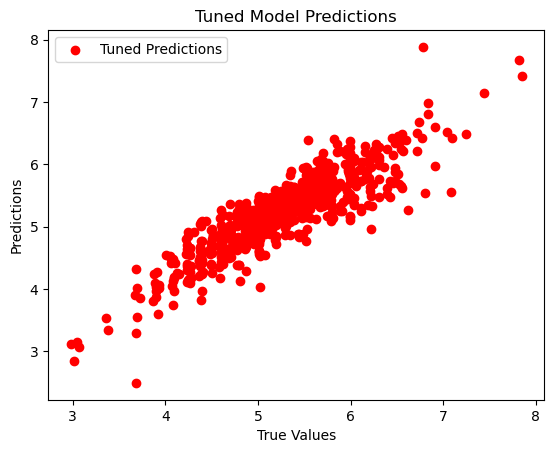

In [134]:
plt.scatter(y_test, y_pred, color='blue', label='Initial Predictions')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Initial Model Predictions')
plt.legend()
plt.show()

# Plotting the tuned predictions
plt.scatter(y_test, y_pred_tuned, color='red', label='Tuned Predictions')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Tuned Model Predictions')
plt.legend()
plt.show()



# Lasso Regression

In [127]:
lasso = Lasso(alpha=0.1)  # You can adjust the alpha parameter
lasso.fit(x_train, y_train)

# Make predictions
y_pred = lasso.predict(x_test)

r2 = r2_score(y_test, y_pred)
print('R2 Score : ',r2)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

R2 Score :  0.684123742473943
Mean Squared Error: 0.15616375608040328


# Ridge Regression

In [129]:
ridge = Ridge(alpha=0.1)  # You can adjust the alpha parameter
ridge.fit(x_train, y_train)

# Make predictions
y_pred = ridge.predict(x_test)

r2 = r2_score(y_test, y_pred)
print('R2 Score : ',r2)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

R2 Score :  0.7732097331164892
Mean Squared Error: 0.11212118377109932


# ElasticNet Regression

In [130]:
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)  # You can adjust the alpha and l1_ratio parameters
elastic_net.fit(x_train, y_train)

# Make predictions
y_pred = elastic_net.predict(x_test)

r2 = r2_score(y_test, y_pred)
print('R2 Score : ',r2)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

R2 Score :  0.7089584530555821
Mean Squared Error: 0.14388590488647943
